<a href="https://colab.research.google.com/github/srilav/machinelearning/blob/main/M6_NB_MiniProject_5_Finance_Portfolio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Certification Program in Computational Data Science
## A program by IISc and TalentSprint
### MiniProject 5: Finance Portfolio

## Learning Objectives

At the end of the experiment, you will be able to:

* build a finance portfolio
* optimize and find the maximum return, minimum risk of a portfolio
* cluster the asset parameters to group the similar assets
* select the optimal portfolio of diversified assets


## Dataset

Dataset chosen for this mini project is Dow Jones Industrial Average (DJIA) Index viz., Apple (AAPL), American Express (AXP), Boeing (BA), Caterpillar (CAT), Cisco Systems (CSCO), Chevron (CVX), Walt Disney (DIS), Goldman Sachs (GS), The Home Depot (HD), IBM (IBM), Intel (INTC), Johnson & Johnson (JNJ), JP Morgan Chase (JPM), Coca-Cola (KO), McDonald's (MCD), 3M(MMM), Merck & Co (MRK), Microsoft (MSFT), Nike (NKE), Pfizer (PFE), Procter & Gamble (PG), Travelers (TRV), United Health Group (UNH), United Technologies (UTX), Verizon (V), Verizon (VZ), Walgreens Boots Alliance (WBA), Walmart (WMT), Exxon Mobil (XOM).

The data set considered is from April 11, 2014 to April 11, 2019. Fig. 3.4 illustrates a snapshot of the DJIA dataset.

![img](https://github.com/PaiViji/PythonFinance-PortfolioOptimization/raw/2bb0ae9f32f44ff66302ea33f53c02e746583a05/Lesson3_HeuristicPortfolioSelection/Lesson3Fig3_4.png)

 

## Information



The universe of stocks can truly baffle investors who wish to make the best selection of stocks for their portfolios. It is a daunting task to make a prudent selection of stocks, given the vastness of the choices and the diverse behavioural characteristics of each of these stocks with respect to itself and to one another

**Portfolio Return and Risk:**
Harry Markowtiz proposed a framework known as Mean-Variance Analysis which won him the 1990 Nobel Prize in Economics. The framework laid the foundation for what is known as the Modern Portfolio Theory, that views the *portfolio return* as the capital gain that can be expected by holding a portfolio and *portfolio risk* as the extent of capital losses that it can suffer possibly due to adverse market movements. Portfolio return and risk were modelled using the mean and variance of the portfolio's fluctuations respectively.

**Diversification Index:**
A Diversification Index quantifies diversification. There are several diversification indices discussed in the literature. Diversification Ratio proposed and patented by Yves Choueifaty in 2008 [CHO 08, CHO 13], is a diversification index of recent origin, built on the inter-dependence between assets of a portfolio. Diversification Ratio is the ratio of the weighted sum of individual asset volatilities to the portfolio's volatility.

**Efficient Frontier:** An efficient frontier is a set of investment portfolios that are expected to provide the highest returns at a given level of risk. A portfolio is said to be efficient if there is no other portfolio that offers higher returns for a lower or equal amount of risk. Where portfolios are located on the efficient frontier depends on the investor’s degree of risk tolerance.

**Sharpe Ratio:** The Sharpe ratio was developed by Nobel laureate William F. Sharpe and is used to help investors understand the return of an investment compared to its risk. The ratio is the average return earned in excess of the risk-free rate per unit of volatility or total risk. Volatility is a measure of the price fluctuations of an asset or portfolio.

## Objectives:

* How can the investor decide on which combination of assets is the best?
* How can diversification be ensured, when the assets belong to different sectors and therefore behave differently under varying market conditions?
* How would an investor determine the optimal weights, which will ensure maximum return risk for the portfolio invested in ?
* How would an investor know how much to invest in each one of the assets in the portfolio ?

## Grading = 10 Points

In [ ]:
#@title Download the dataset
!wget -qq https://cdn.iisc.talentsprint.com/CDS/MiniProjects/DJIA_Apr112014_Apr112019.csv

### Import required Packages 

In [ ]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans 

### Data Preparation (1 point)

In [ ]:
#input stock dataset
StockFileName = '/content/DJIA_Apr112014_Apr112019.csv'
stock = pd.read_csv(StockFileName).drop("Date", axis='columns')
# YOUR CODE HERE
stock.head()

,AAPL,AXP,BA,CAT,CSCO,CVX,DIS,GS,HD,IBM,...,PFE,PG,TRV,UNH,UTX,V,VZ,WBA,WMT,XOM
0,74.230003,84.540001,122.070000,101.449997,22.459999,117.029999,77.010002,152.720001,75.699997,195.190002,...,29.860001,80.760002,85.300003,78.949997,113.930000,49.157501,47.070000,64.260002,76.500000,96.720001
1,74.525711,85.500000,123.250000,102.779999,22.850000,118.699997,77.620003,154.740005,75.970001,197.770004,...,29.870001,80.809998,85.500000,79.180000,114.940002,50.252499,47.270000,65.669998,77.379997,97.860001
2,73.994286,86.040001,124.269997,102.500000,22.889999,120.300003,77.660004,154.919998,75.889999,197.020004,...,29.889999,80.839996,85.889999,79.510002,115.839996,51.012501,46.919998,66.010002,76.879997,98.680000
3,74.144287,87.400002,126.040001,102.930000,23.030001,121.830002,78.949997,157.220001,76.580002,196.399994,...,30.090000,81.650002,86.779999,78.190002,118.070000,52.340000,47.099998,66.160004,77.220001,99.940002
4,74.991432,86.220001,127.919998,102.830002,23.209999,123.680000,79.989998,157.440002,77.089996,190.009995,...,30.250000,81.760002,86.680000,75.779999,118.570000,51.987499,47.599998,66.750000,77.660004,100.419998


In [ ]:
stock.shape

(1259, 29)

In [ ]:
stock.dtypes

AAPL    float64
AXP     float64
BA      float64
CAT     float64
CSCO    float64
CVX     float64
DIS     float64
GS      float64
HD      float64
IBM     float64
INTC    float64
JNJ     float64
JPM     float64
KO      float64
MCD     float64
MMM     float64
MRK     float64
MSFT    float64
NKE     float64
PFE     float64
PG      float64
TRV     float64
UNH     float64
UTX     float64
V       float64
VZ      float64
WBA     float64
WMT     float64
XOM     float64
dtype: object

#### Data Summarization

* Remove Date column and summarize the data

In [ ]:
# YOUR CODE HERE

#### Compute the stock returns

* Compute the mean of returns and covariance of returns

In [ ]:
stock

,AAPL,AXP,BA,CAT,CSCO,CVX,DIS,GS,HD,IBM,...,PFE,PG,TRV,UNH,UTX,V,VZ,WBA,WMT,XOM
0,74.230003,84.540001,122.070000,101.449997,22.459999,117.029999,77.010002,152.720001,75.699997,195.190002,...,29.860001,80.760002,85.300003,78.949997,113.930000,49.157501,47.070000,64.260002,76.500000,96.720001
1,74.525711,85.500000,123.250000,102.779999,22.850000,118.699997,77.620003,154.740005,75.970001,197.770004,...,29.870001,80.809998,85.500000,79.180000,114.940002,50.252499,47.270000,65.669998,77.379997,97.860001
2,73.994286,86.040001,124.269997,102.500000,22.889999,120.300003,77.660004,154.919998,75.889999,197.020004,...,29.889999,80.839996,85.889999,79.510002,115.839996,51.012501,46.919998,66.010002,76.879997,98.680000
3,74.144287,87.400002,126.040001,102.930000,23.030001,121.830002,78.949997,157.220001,76.580002,196.399994,...,30.090000,81.650002,86.779999,78.190002,118.070000,52.340000,47.099998,66.160004,77.220001,99.940002
4,74.991432,86.220001,127.919998,102.830002,23.209999,123.680000,79.989998,157.440002,77.089996,190.009995,...,30.250000,81.760002,86.680000,75.779999,118.570000,51.987499,47.599998,66.750000,77.660004,100.419998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,197.000000,110.959999,391.929993,140.360001,55.209999,126.419998,115.000000,202.380005,202.059998,143.279999,...,42.990002,103.650002,136.399994,248.779999,133.720001,157.649994,59.090000,54.689999,98.830002,82.489998
1255,200.100006,110.699997,374.519989,139.820007,55.490002,126.680000,114.959999,202.539993,203.550003,143.389999,...,43.139999,104.970001,135.880005,248.750000,133.559998,157.750000,59.130001,55.060001,99.230003,83.000000
1256,199.500000,109.849998,369.040009,136.350006,55.180000,125.540001,116.860001,200.619995,200.899994,142.110001,...,42.840000,104.660004,135.190002,248.789993,132.250000,157.490005,58.400002,54.500000,98.690002,81.930000
1257,200.619995,110.160004,364.940002,137.529999,55.820000,125.489998,117.160004,202.979996,199.429993,143.020004,...,42.730000,104.650002,135.460007,246.029999,131.660004,158.559998,58.610001,54.509998,99.599998,81.559998


In [ ]:
# YOUR CODE HERE (yearly return for each company)
def yearly_ind_returns(df):
  df1 = df.pct_change() #daily returns of each company as log functions
  df1.drop(index=df1.index[0], axis=0, inplace=True) #drop the redundant first row 
  mean_return = df1.mean()*261
  return mean_return

yearly_ind_returns(stock)

AAPL    0.235620
AXP     0.075952
BA      0.260124
CAT     0.100894
CSCO    0.211408
CVX     0.040494
DIS     0.103757
GS      0.086492
HD      0.221302
IBM    -0.042048
INTC    0.189857
JNJ     0.082341
JPM     0.157672
KO      0.050000
MCD     0.147554
MMM     0.115418
MRK     0.093438
MSFT    0.260331
NKE     0.209026
PFE     0.088109
PG      0.065621
TRV     0.111047
UNH     0.249205
UTX     0.048848
V       0.264344
VZ      0.060404
WBA    -0.004399
WMT     0.076897
XOM    -0.015925
dtype: float64

In [ ]:
#yearly_risk
def yearly_ind_risk(df):
  df1 = df.pct_change() #daily returns of each company as log functions
  df1.drop(index=df1.index[0], axis=0, inplace=True) #drop the redundant first row 
  annual_risk = df1.std()*np.sqrt(261)
  return annual_risk

yearly_ind_risk(stock)


AAPL    0.248980
AXP     0.207406
BA      0.244364
CAT     0.267076
CSCO    0.216087
CVX     0.224561
DIS     0.187743
GS      0.234884
HD      0.190451
IBM     0.206403
INTC    0.256440
JNJ     0.161669
JPM     0.210782
KO      0.145059
MCD     0.168394
MMM     0.179863
MRK     0.198153
MSFT    0.235388
NKE     0.240228
PFE     0.179085
PG      0.152925
TRV     0.166024
UNH     0.211997
UTX     0.184253
V       0.211066
VZ      0.173785
WBA     0.258191
WMT     0.198444
XOM     0.192109
dtype: float64

In [ ]:
#yearly_covariance
def yearly_ind_cov(df):
  df1 = df.pct_change() #daily returns of each company as log functions
  df1.drop(index=df1.index[0], axis=0, inplace=True) #drop the redundant first row 
  annual_cov = df1.cov()
  return annual_cov

yearly_ind_cov(stock)


,AAPL,AXP,BA,CAT,CSCO,CVX,DIS,GS,HD,IBM,...,PFE,PG,TRV,UNH,UTX,V,VZ,WBA,WMT,XOM
AAPL,0.000238,0.000067,0.000096,0.000104,0.000100,0.000066,0.000068,0.000095,0.000073,0.000071,...,0.000054,0.000042,0.000051,0.000077,0.000069,0.000101,0.000029,0.000070,0.000045,0.000063
AXP,0.000067,0.000165,0.000080,0.000095,0.000070,0.000063,0.000057,0.000106,0.000066,0.000066,...,0.000054,0.000034,0.000054,0.000072,0.000068,0.000085,0.000034,0.000067,0.000038,0.000052
BA,0.000096,0.000080,0.000229,0.000131,0.000089,0.000081,0.000072,0.000107,0.000075,0.000078,...,0.000053,0.000041,0.000062,0.000074,0.000093,0.000092,0.000042,0.000068,0.000051,0.000073
CAT,0.000104,0.000095,0.000131,0.000273,0.000104,0.000124,0.000069,0.000132,0.000080,0.000089,...,0.000061,0.000039,0.000068,0.000072,0.000099,0.000096,0.000040,0.000068,0.000043,0.000105
CSCO,0.000100,0.000070,0.000089,0.000104,0.000179,0.000077,0.000071,0.000093,0.000072,0.000082,...,0.000062,0.000044,0.000059,0.000066,0.000074,0.000094,0.000045,0.000071,0.000056,0.000071
CVX,0.000066,0.000063,0.000081,0.000124,0.000077,0.000193,0.000057,0.000093,0.000060,0.000068,...,0.000051,0.000043,0.000057,0.000059,0.000062,0.000071,0.000048,0.000058,0.000036,0.000128
DIS,0.000068,0.000057,0.000072,0.000069,0.000071,0.000057,0.000135,0.000077,0.000059,0.000057,...,0.000048,0.000036,0.000049,0.000056,0.000054,0.000067,0.000041,0.000063,0.000041,0.000057
GS,0.000095,0.000106,0.000107,0.000132,0.000093,0.000093,0.000077,0.000211,0.000080,0.000080,...,0.000063,0.000037,0.000077,0.000082,0.000083,0.000100,0.000041,0.000082,0.000042,0.000081
HD,0.000073,0.000066,0.000075,0.000080,0.000072,0.000060,0.000059,0.000080,0.000139,0.000062,...,0.000053,0.000039,0.000054,0.000066,0.000060,0.000079,0.000041,0.000069,0.000055,0.000051
IBM,0.000071,0.000066,0.000078,0.000089,0.000082,0.000068,0.000057,0.000080,0.000062,0.000163,...,0.000051,0.000043,0.000053,0.000056,0.000072,0.000075,0.000044,0.000053,0.000043,0.000062


### Portfolio Return and Portfolio Risk ( 2 points)

* Apply equal weighted portfolio construction method to portfolio
* Obtain the annualized risk (%) and the expected annual return (%) of the portfolio



Let P be a portfolio comprising assets $A_1, A_2,...A_N$ with weights $W_1, W_2,...W_N$ and $r_1, r_2, ...r_N$ as the asset returns. The portfolio return r determined by a weighted summation of its individual asset returns is given by,
 $$r = W_1 . r_1 + W_2 . r_2 + .. W_N . r_N = \sum_{i=1}^N W_i . r_i $$

The annualized portfolio return assuming that the number of trading days in a year were $T_y$ ( for example, 261 out of 365 days in a year), is given by,

$$r_{Ann} = \Bigg( \sum_{i=1}^N W_i . r_i \Bigg) . T_y$$

Portfolio risk is the standard deviation of its returns and is given by,

$$ \sigma = \sqrt{\sum_i \sum_j W_i . W_j . \sigma_{ij}}$$


where $\sigma_{ij}$ is the covariance of returns between assets i and j of the portfolio, also referred to as the variance-covariance matrix of returns. Standard deviation is a prominent measure of dispersion of data borrowed from Statistics and describes the deviation or spread of the data from its mean. In the case of portfolios, standard deviation of its returns, which is its risk, helps to measure the consistency of the returns. The annualized portfolio risk in percentage,  $\sigma_{Ann}$ is given by,

$$ \sigma_{Ann} = \sqrt{ \Bigg(\sum_i \sum_j W_i . W_j . \sigma_{ij} \Bigg) . T_y}$$

where $T_y$ is the number of trading days in a year.



In [ ]:
# YOUR CODE HERE (ANNUAL RETURN FOR EQUALLY WEIGHTED PORTFOLIOS)
def yearly_return_equal_weighted_portfolios(df):
  df1 = df.pct_change()
  df1.drop(index=df1.index[0], axis=0, inplace=True) #drop the redundant first row
  size = df1.shape[1]
  weights = np.empty(size)
  weights.fill(1/size)
  portfolios = (weights*df1)
  yearly_returns_portfolios = portfolios.mean()*261
  return yearly_returns_portfolios

yearly_return_equal_weighted_portfolios(stock)

AAPL    0.008125
AXP     0.002619
BA      0.008970
CAT     0.003479
CSCO    0.007290
CVX     0.001396
DIS     0.003578
GS      0.002982
HD      0.007631
IBM    -0.001450
INTC    0.006547
JNJ     0.002839
JPM     0.005437
KO      0.001724
MCD     0.005088
MMM     0.003980
MRK     0.003222
MSFT    0.008977
NKE     0.007208
PFE     0.003038
PG      0.002263
TRV     0.003829
UNH     0.008593
UTX     0.001684
V       0.009115
VZ      0.002083
WBA    -0.000152
WMT     0.002652
XOM    -0.000549
dtype: float64

In [ ]:
#ANNUALIZED RISK FOR EQUAL WEIGHTED PORTFOLIOS
def annual_risk_equal_weighted_portfolios(df):
  df1 = df.pct_change()
  df1.drop(index=df1.index[0], axis=0, inplace=True) #drop the redundant first row
  size = df1.shape[1]
  weights = np.empty(size)
  weights.fill(1/size)
  portfolios = (weights*df1)
  yearly_portfolios_sd = portfolios.std()
  annual_risks = yearly_portfolios_sd*np.sqrt(261)
  return annual_risks

  
annual_risk_equal_weighted_portfolios(stock)


AAPL    0.008586
AXP     0.007152
BA      0.008426
CAT     0.009210
CSCO    0.007451
CVX     0.007743
DIS     0.006474
GS      0.008099
HD      0.006567
IBM     0.007117
INTC    0.008843
JNJ     0.005575
JPM     0.007268
KO      0.005002
MCD     0.005807
MMM     0.006202
MRK     0.006833
MSFT    0.008117
NKE     0.008284
PFE     0.006175
PG      0.005273
TRV     0.005725
UNH     0.007310
UTX     0.006354
V       0.007278
VZ      0.005993
WBA     0.008903
WMT     0.006843
XOM     0.006624
dtype: float64

### Cluster the Assets using K-Means (2 points)

* Prepare the data for K-Means by concatenating mean returns and covariance returns

* Find the suitable k parameter and fit the model

* Label the nearest assets in clusters

In [ ]:
""" prepare the data for k means clustering """
# YOUR CODE HERE
#Calculating annual mean returns and variances
returns = yearly_ind_returns(stock)
covariance = stock.pct_change().drop(index=stock.index[0], axis=0).cov()
#returns.columns = ["Returns"]
#Concatenating the returns and variances into a single data-frame
return_variance = pd.concat([returns, covariance], axis = 1).dropna()
#return_variance.columns = ["Returns","Variance"]
return_variance

,0,AAPL,AXP,BA,CAT,CSCO,CVX,DIS,GS,HD,...,PFE,PG,TRV,UNH,UTX,V,VZ,WBA,WMT,XOM
AAPL,0.235620,0.000238,0.000067,0.000096,0.000104,0.000100,0.000066,0.000068,0.000095,0.000073,...,0.000054,0.000042,0.000051,0.000077,0.000069,0.000101,0.000029,0.000070,0.000045,0.000063
AXP,0.075952,0.000067,0.000165,0.000080,0.000095,0.000070,0.000063,0.000057,0.000106,0.000066,...,0.000054,0.000034,0.000054,0.000072,0.000068,0.000085,0.000034,0.000067,0.000038,0.000052
BA,0.260124,0.000096,0.000080,0.000229,0.000131,0.000089,0.000081,0.000072,0.000107,0.000075,...,0.000053,0.000041,0.000062,0.000074,0.000093,0.000092,0.000042,0.000068,0.000051,0.000073
CAT,0.100894,0.000104,0.000095,0.000131,0.000273,0.000104,0.000124,0.000069,0.000132,0.000080,...,0.000061,0.000039,0.000068,0.000072,0.000099,0.000096,0.000040,0.000068,0.000043,0.000105
CSCO,0.211408,0.000100,0.000070,0.000089,0.000104,0.000179,0.000077,0.000071,0.000093,0.000072,...,0.000062,0.000044,0.000059,0.000066,0.000074,0.000094,0.000045,0.000071,0.000056,0.000071
CVX,0.040494,0.000066,0.000063,0.000081,0.000124,0.000077,0.000193,0.000057,0.000093,0.000060,...,0.000051,0.000043,0.000057,0.000059,0.000062,0.000071,0.000048,0.000058,0.000036,0.000128
DIS,0.103757,0.000068,0.000057,0.000072,0.000069,0.000071,0.000057,0.000135,0.000077,0.000059,...,0.000048,0.000036,0.000049,0.000056,0.000054,0.000067,0.000041,0.000063,0.000041,0.000057
GS,0.086492,0.000095,0.000106,0.000107,0.000132,0.000093,0.000093,0.000077,0.000211,0.000080,...,0.000063,0.000037,0.000077,0.000082,0.000083,0.000100,0.000041,0.000082,0.000042,0.000081
HD,0.221302,0.000073,0.000066,0.000075,0.000080,0.000072,0.000060,0.000059,0.000080,0.000139,...,0.000053,0.000039,0.000054,0.000066,0.000060,0.000079,0.000041,0.000069,0.000055,0.000051
IBM,-0.042048,0.000071,0.000066,0.000078,0.000089,0.000082,0.000068,0.000057,0.000080,0.000062,...,0.000051,0.000043,0.000053,0.000056,0.000072,0.000075,0.000044,0.000053,0.000043,0.000062


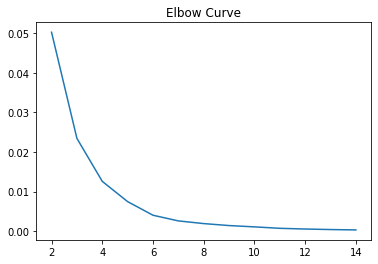

In [ ]:
#elbow method to choose optimal number of clusters
X =  return_variance.values #Converting return_variance into nummpy array
sse = []
for k in range(2,15):
    
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(X)
    
    sse.append(kmeans.inertia_) #SSE for each n_clusters
plt.plot(range(2,15), sse)
plt.title("Elbow Curve")
plt.show()

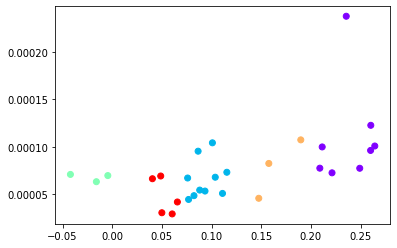

In [ ]:
""" kmeans clustering of assets using the characteristic vector of mean return and variance-covariance vector of returns """ 
# YOUR CODE HERE
kmeans = KMeans(n_clusters = 5).fit(X)
centroids = kmeans.cluster_centers_
plt.scatter(X[:,0],X[:,1], c = kmeans.labels_, cmap ="rainbow")
plt.show()

In [ ]:
""" fix asset labels to cluster points """
# YOUR CODE HERE
Company = pd.DataFrame(return_variance.index)
cluster_labels = pd.DataFrame(kmeans.labels_)
clusterd_assets = pd.concat([Company, cluster_labels],axis = 1)
clusterd_assets

,0,0
0,AAPL,0
1,AXP,1
2,BA,0
3,CAT,1
4,CSCO,0
5,CVX,4
6,DIS,1
7,GS,1
8,HD,0
9,IBM,2


### Diversification Index (1 point)

* Compute the Diversification Ratio of the Equal Weighted Portfolio

Let N be the number of assets in the portfolio spanning different asset classes or belonging to a specific class. Let $(\bar{w}=(w_1,w_2,...w_N) )$ be the weights or the proportion of capital to be invested in individual assets in the portfolio and $\bar{w}'$ its transpose. Let $(\bar{\sigma}=(\sigma_1,\sigma_2,...\sigma_N))$ be the standard deviations of returns on the assets and V, the variance-covariance matrix of returns on the assets. The Diversification Ratio of a portfolio is given as follows:

$$ \Bigg( \frac{\bar\sigma . \bar w'}{\sqrt{\bar w . V . \bar w'}}\Bigg)$$



In [ ]:
# YOUR CODE HERE
def diversification_index_equal_weighted_portfolio(df):
  df1 = df.pct_change()
  df1.drop(index=df1.index[0], axis=0, inplace=True) #drop the redundant first row
  size = df1.shape[1]
  weights = np.empty(size)
  weights.fill(1/size)
  cov_matrix = df1.cov()
  var = df1.var()
  numerator = np.dot(var,weights)
  denominator = np.sqrt(np.dot(np.dot(weights,cov_matrix),weights))
  index = numerator/denominator
  return index

diversification_index_equal_weighted_portfolio(stock)

0.02041805531451641

### Inverse Volatility Weighted Portfolio (1 point)

* Apply inverse volatility weighted portfolio construction method for the DJIA portfolio
* Compute Inverse volatility weighted portfolio annual risk
* Compute Inverse volatility weighted portfolio annual return
* Compute the Diversification Ratio of the Inverse Volatility Weighted Portfolio

An inverse volatility weighted portfolio is one in which highly volatile assets are allotted smaller weights and low volatile assets are allotted larger weights. Thus, the weights of the individual assets in the portfolio are proportional to the reciprocals of their individual volatilities.
The weights are given by,

$$W_i = \frac{\frac{1}{\sigma_i}}{\sum_j \frac{1}{\sigma_j}} $$

In [ ]:
""" Inverse volatility weighted portfolio construction: Annualized risk and Expected annualized portfolio return """
# YOUR CODE HERE
def annual_return_inverse_volatility_weighted_portfolio(df):
  df1 = df.pct_change()
  df1.drop(index=df1.index[0], axis=0, inplace=True) #drop the redundant first row
  var = df1.var()
  weights = []
  for variance in var:
    weight = (1/variance)/(np.sum(np.reciprocal(var)))
    weights.append(weight)
  portfolios = (weights*df1)
  yearly_returns_portfolios = portfolios.mean()*261
  return yearly_returns_portfolios

annual_return_inverse_volatility_weighted_portfolio(stock)
  


AAPL    0.005106
AXP     0.002372
BA      0.005852
CAT     0.001900
CSCO    0.006082
CVX     0.001079
DIS     0.003954
GS      0.002106
HD      0.008196
IBM    -0.001326
INTC    0.003878
JNJ     0.004232
JPM     0.004767
KO      0.003192
MCD     0.006990
MMM     0.004793
MRK     0.003197
MSFT    0.006312
NKE     0.004866
PFE     0.003690
PG      0.003769
TRV     0.005412
UNH     0.007449
UTX     0.001933
V       0.007971
VZ      0.002687
WBA    -0.000089
WMT     0.002623
XOM    -0.000580
dtype: float64

In [ ]:
def annual_risk_inverse_volatility_weighted_portfolio(df):
  df1 = df.pct_change()
  df1.drop(index=df1.index[0], axis=0, inplace=True) #drop the redundant first row
  var = df1.var()
  weights = []
  for variance in var:
    weight = (1/variance)/(np.sum(np.reciprocal(var)))
    weights.append(weight)
  portfolios = (weights*df1)
  yearly_risk_portfolios = portfolios.std()*np.sqrt(261)
  return yearly_risk_portfolios

annual_return_inverse_volatility_weighted_portfolio(stock)
  

AAPL    0.005106
AXP     0.002372
BA      0.005852
CAT     0.001900
CSCO    0.006082
CVX     0.001079
DIS     0.003954
GS      0.002106
HD      0.008196
IBM    -0.001326
INTC    0.003878
JNJ     0.004232
JPM     0.004767
KO      0.003192
MCD     0.006990
MMM     0.004793
MRK     0.003197
MSFT    0.006312
NKE     0.004866
PFE     0.003690
PG      0.003769
TRV     0.005412
UNH     0.007449
UTX     0.001933
V       0.007971
VZ      0.002687
WBA    -0.000089
WMT     0.002623
XOM    -0.000580
dtype: float64

In [ ]:
""" Inverse volatility weighted portfolio: Diversification Ratio"""
# YOUR CODE HERE
def diversification_index_equal_weighted_portfolio(df):
  df1 = df.pct_change()
  df1.drop(index=df1.index[0], axis=0, inplace=True) #drop the redundant first row
  size = df1.shape[1]
  var = df1.var()
  weights = []
  for variance in var:
    weight = (1/variance)/(np.sum(np.reciprocal(var)))
    weights.append(weight)
  cov_matrix = df1.cov()
  numerator = np.dot(var,weights)
  denominator = np.sqrt(np.dot(np.dot(weights,cov_matrix),weights))
  index = numerator/denominator
  return index

diversification_index_equal_weighted_portfolio(stock)

0.019490898937651942

### Efficient Frontier (2 points)
**Optimize the portfolio weights:**

* Initialize the random weights for each portfolio
* Calculate return, volatility for each portfolio


The efficient set obtained by the Mean-Variance Optimization model can be graphically represented by what is called an efficient frontier. An efficient frontier is a risk-return tradeoff graph, which describes a set of optimal portfolios that yield the highest expected portfolio return for a defined level of risk or the lowest possible risk for a defined level of expected portfolio return. It graphs the optimal structure of the portfolio which yields the maximum expected return for a given level of risk or vice-versa.


In [ ]:
# YOUR CODE HERE
np.random.seed(1)

def portfolio_generator(df, num_portfolios):
  df1 = df.pct_change()
  df1.drop(index=df1.index[0], axis=0, inplace=True) #drop the redundant first row
  ind_er = df1.mean()
  cov_matrix = df1.cov()
  num_assets = len(df.columns)
  p_ret = []
  p_vol = []
  p_weights = []
  for portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    # sum of weights must be 1
    weights = weights/np.sum(weights)
    p_weights.append(weights)
    # Annual Returns are the product of individual expected returns of asset and its weights 
    returns = np.dot(weights, ind_er)
    p_ret.append(returns)
    # Portfolio Variance
    var = cov_matrix.mul(weights, axis=0).mul(weights, axis=1).sum().sum()
    # Daily standard deviation
    sd = np.sqrt(var)
    # Annual standard deviation = volatility
    ann_sd = sd * np.sqrt(261)
    p_vol.append(ann_sd)
  data_ = {'Returns':p_ret, 'Volatility':p_vol}
  for counter, symbol in enumerate(df1.columns.tolist()):
    data_[symbol + '_weight'] = [w[counter] for w in p_weights]
  # Create dataframe of the 10000 portfolios
  portfolios  = pd.DataFrame(data_)
  return portfolios

portfolios = portfolio_generator(stock,1000)

In [ ]:
portfolios.head()

,Returns,Volatility,AAPL_weight,AXP_weight,BA_weight,CAT_weight,CSCO_weight,CVX_weight,DIS_weight,GS_weight,...,PFE_weight,PG_weight,TRV_weight,UNH_weight,UTX_weight,V_weight,VZ_weight,WBA_weight,WMT_weight,XOM_weight
0,0.000445,0.127020,0.034223,0.059114,0.000009,0.024811,0.012044,0.007578,0.015286,0.028359,...,0.016257,0.065714,0.079461,0.025722,0.056816,0.071922,0.073417,0.006979,0.003205,0.013937
1,0.000568,0.138045,0.064547,0.007229,0.030953,0.070409,0.039190,0.050856,0.023192,0.050461,...,0.021153,0.009558,0.001424,0.049897,0.015556,0.019519,0.036133,0.003922,0.042200,0.010785
2,0.000502,0.133785,0.037504,0.044533,0.006513,0.026351,0.044192,0.026359,0.003179,0.034105,...,0.022132,0.047783,0.046203,0.056215,0.039691,0.047791,0.022204,0.017179,0.057015,0.027244
3,0.000490,0.133424,0.059900,0.041189,0.038597,0.007124,0.058947,0.027932,0.035908,0.025338,...,0.000982,0.057703,0.042893,0.061917,0.010699,0.008514,0.057899,0.043261,0.004098,0.046902
4,0.000535,0.130780,0.058335,0.071424,0.055058,0.009616,0.001538,0.002028,0.002190,0.019052,...,0.018028,0.062454,0.030013,0.066821,0.057813,0.043042,0.010559,0.004636,0.009390,0.003447


#### Visualize Efficient Frontier

* Visualize the volatility and returns of 1000 portfolios
* Find the minimum variance portfolio and plot the weights of assets

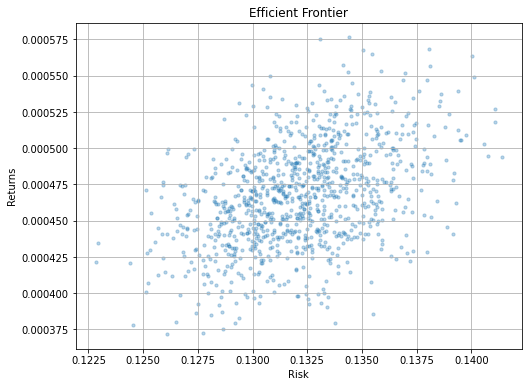

In [ ]:
# YOUR CODE HERE
# Visualize efficient frontier
plt.figure(figsize=(8,6))
plt.scatter(portfolios['Volatility'], portfolios['Returns'], marker='o', s=10, alpha=0.3)
plt.title("Efficient Frontier")
plt.xlabel("Risk")
plt.ylabel("Returns")
plt.grid()
plt.show()

### Sharpe Ratio (1 point)

* Calculate Sharpe Ratio for the assets

Sharpe Ratio, developed by Nobel Laureate William F Sharpe, is a measure of calculating risk adjusted return. It serves to help investors know about the returns on their investments relative to the risks they hold. The Sharpe Ratio is defined as

$$Sharpe Ratio = \frac{R_P - R_f}{\sigma_p} $$

where:

$R_p$ = return of portfolio

$R_f$ = risk-free rate

$\sigma_p$ = standard deviation of the portfolio’s excess return
​	

**Note:** The risk-free rate of return is the return of an investment with zero risks, meaning it's the return investors could expect for taking no risk.



In [ ]:
# Risk-free return
rf = 0.0006
# YOUR CODE HERE
rp = portfolios["Returns"]
sigmap = portfolios["Volatility"]
sharpe = (rf-rp)/sigmap

In [ ]:
sharpe

0      0.001221
1      0.000229
2      0.000736
3      0.000822
4      0.000495
         ...   
995    0.000952
996    0.000813
997    0.001512
998    0.001287
999    0.001234
Length: 1000, dtype: float64

#### Plot the portfolio

* Find and plot the optimal portfolio using Sharpe Ratio
* Highlight the minimum risk and maximum return of the portfolio

In [ ]:
# Highest sharpe ratio
optimal_idx = np.argmax(sharpe)
print("Highest Sharpe ratio: ", sharpe[optimal_idx])

Highest Sharpe ratio:  0.0018093463048529546


In [ ]:
optimal_risky_port = portfolios.iloc[optimal_idx]
optimal_risky_port

Returns        0.000372
Volatility     0.126078
AAPL_weight    0.018769
AXP_weight     0.036013
BA_weight      0.003044
CAT_weight     0.059091
CSCO_weight    0.028341
CVX_weight     0.015094
DIS_weight     0.006146
GS_weight      0.011028
HD_weight      0.015092
IBM_weight     0.063859
INTC_weight    0.029859
JNJ_weight     0.069633
JPM_weight     0.036710
KO_weight      0.067439
MCD_weight     0.045397
MMM_weight     0.069689
MRK_weight     0.023874
MSFT_weight    0.018294
NKE_weight     0.031301
PFE_weight     0.028519
PG_weight      0.056306
TRV_weight     0.029210
UNH_weight     0.016119
UTX_weight     0.028551
V_weight       0.025923
VZ_weight      0.074390
WBA_weight     0.037620
WMT_weight     0.003101
XOM_weight     0.051589
Name: 802, dtype: float64

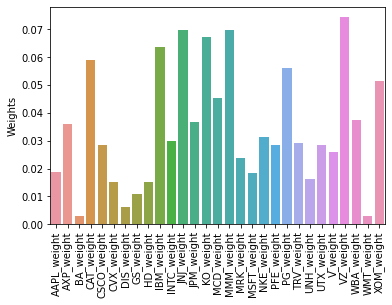

In [ ]:
# YOUR CODE HERE
sns.barplot(x = optimal_risky_port[2:].index, y = optimal_risky_port[2:])
plt.ylabel("Weights")
plt.xticks(rotation=90)
plt.show()

### Report Analysis

* Try with a subset of assets and comment on diversification ratio

* Comment on the portfolio that consists of assets with highest return (irrespective of risk)

* Discuss the optimized portfolio and weights of the assets

* Based on K-Means clusters, find the subset of assets which is exhibiting greater sharpe ratio
